<a href="https://colab.research.google.com/github/cgautam93/hello-world/blob/master/Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# Supress Warnings

import warnings
warnings.filterwarnings('ignore')

# Import the numpy and pandas package

import numpy as np
import pandas as pd

# Data Visualisation

import matplotlib.pyplot as plt 
import seaborn as sns

In [2]:
#Uploading the Dataset.csv file from the desktop

from google.colab import files
uploaded = files.upload()

Saving Dataset.csv to Dataset (1).csv


In [3]:
#import the csv to dataframe

import io
df = pd.read_csv(io.BytesIO(uploaded['Dataset.csv']))

In [4]:
#Top 5 rows of our dataset

df.head()

,ICO,PPE,Branch Name,Client Code,Line Type,Effective Date,Expiration Date,Insurance Tenure,Line Status,Producer,Premium,Commision,Producer Commision,Account Manager,Client Service Representative,Churn
0,ACAIN1,BSRINSU-01,"AveNo Insurance Services, LLC",ALCACAT-01,Property,8/29/2019 0:00,8/29/2020 0:00,12.0,Rewrite,HOUSE1,2276.00,227.60,79.66,Tammy Davis,Tammy Davis,No
1,ACAIN1,UNIST1,"AveNo Insurance Services, LLC",VISTTUR-01,Worker's Compensation,2/13/2020 0:00,2/13/2021 0:00,12.0,Rewrite,HOUSE1,10192.00,2038.40,2038.40,Tammy Davis,Tammy Davis,No
2,AEGSE1,AEGIS1,"AveNo Insurance Services, LLC",SLAMJAM-01,Dwelling Fire,1/10/2019 0:00,1/10/2020 0:00,12.0,Renewal,HOUSE1,524.00,78.60,0.00,Christie Honza,Christie Honza,No
3,AEGSE1,AEGIS1,"AveNo Insurance Services, LLC",SLAMJAM-01,Dwelling Fire,1/10/2020 0:00,1/10/2021 0:00,12.0,Renewal,HOUSE1,507.00,50.70,0.00,Christie Honza,Christie Honza,No
4,AFLAC1,AFLAC1,"AveNo Insurance Services, LLC",EARTDES-01,Accidental Death/Dismemberment,8/1/2019 0:00,8/1/2020 0:00,12.0,Renewal,HOUSE1,909.77,159.08,79.54,NaN,NaN,No


In [5]:
#Checking the dimensions of our dataframe

df.shape

(125890, 16)

In [6]:
#exploring the types of each column

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 125890 entries, 0 to 125889
Data columns (total 16 columns):
 #   Column                         Non-Null Count   Dtype  
---  ------                         --------------   -----  
 0   ICO                            104402 non-null  object 
 1   PPE                            104399 non-null  object 
 2   Branch Name                    104407 non-null  object 
 3   Client Code                    104407 non-null  object 
 4   Line Type                      104407 non-null  object 
 5   Effective Date                 104407 non-null  object 
 6   Expiration Date                104407 non-null  object 
 7   Insurance Tenure               104407 non-null  float64
 8   Line Status                    104407 non-null  object 
 9   Producer                       104350 non-null  object 
 10  Premium                        95056 non-null   float64
 11  Commision                      95043 non-null   float64
 12  Producer Commision            

In [7]:
#Checking the null values in our dataset

df.isnull().sum()

ICO                              21488
PPE                              21491
Branch Name                      21483
Client Code                      21483
Line Type                        21483
Effective Date                   21483
Expiration Date                  21483
Insurance Tenure                 21483
Line Status                      21483
Producer                         21540
Premium                          30834
Commision                        30847
Producer Commision               21483
Account Manager                  39445
Client Service Representative    38561
Churn                            21483
dtype: int64

In [8]:
#Dropping the irrelevant columns
df.drop(['PPE','Account Manager','Account Manager','Client Service Representative','Effective Date','Expiration Date','Line Status','Client Code'],axis=1,inplace=True)


In [9]:
#Checking the dimensions of our dataframe after dropping the columns

df.shape

(125890, 9)

In [10]:
#Dropping the null values from the dataframe

df.dropna(axis=0,inplace=True)

In [11]:
#Dimensions of the dataframe after dropping the null values

df.shape

(94983, 9)

In [12]:
df.Churn.value_counts()

No     83333
Yes    11650
Name: Churn, dtype: int64

In [13]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
df[['Premium','Insurance Tenure','Commision','Producer Commision']]=scaler.fit_transform(df[['Premium','Insurance Tenure','Commision','Producer Commision']])

In [14]:
df['Churn'].replace(to_replace='Yes', value=1, inplace=True)
df['Churn'].replace(to_replace='No',  value=0, inplace=True)

In [15]:
df_dummies = pd.get_dummies(df)
df_dummies

,Insurance Tenure,Premium,Commision,Producer Commision,Churn,ICO_ACAIN1,ICO_ACCIN1,ICO_ACEAM1,ICO_ACEFI1,ICO_ADMCR1,ICO_ADMIN1,ICO_AEGIS1,ICO_AEGSE1,ICO_AFLAC1,ICO_AGCMA1,ICO_AIG001,ICO_ALLCO1,ICO_ALLFI1,ICO_ALLIA1,ICO_ALLIN1,ICO_ALLIN2,ICO_ALLIN3,ICO_ALLLI1,ICO_ALLPR1,ICO_ALLPR2,ICO_ALLTX1,ICO_ALLVE1,ICO_ALLWO1,ICO_ALTEX1,ICO_AMCIN1,ICO_AMEAL1,ICO_AMEBA1,ICO_AMECO1,ICO_AMEEM1,ICO_AMEFI1,ICO_AMEFI2,ICO_AMEFI3,ICO_AMEGE1,ICO_AMEME1,ICO_AMEMO1,...,Producer _SCHKA1,Producer _SCOJA1,Producer _SCRJE1,Producer _SHEHE1,Producer _SIFHO1,Producer _SNILA1,Producer _SNIST1,Producer _SPISA1,Producer _SPISA2,Producer _STEJU1,Producer _STEVI1,Producer _STOCO1,Producer _STORH1,Producer _SWAED1,Producer _SWSP01,Producer _TEEJP1,Producer _TENJA1,Producer _THUWH1,Producer _TYEWI1,Producer _UNKEMP,Producer _VECDE1,Producer _VESPA1,Producer _VESPA2,Producer _WADAS1,Producer _WALAL1,Producer _WARKA1,Producer _WATST1,Producer _WESKI1,Producer _WESLE1,Producer _WHIGE1,Producer _WHIJ01,Producer _WILJO1,Producer _WILKI1,Producer _WILST1,Producer _WILWA1,Producer _WOOMI1,Producer _WYLMA1,Producer _WYNSH1,Producer _YOSKA1,Producer _ZABDA1
0,0.005678,0.000510,0.001214,0.000123,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0.005678,0.001220,0.003064,0.003155,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,0.005678,0.000353,0.001062,0.000000,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,0.005678,0.000352,0.001033,0.000000,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,0.005678,0.000388,0.001144,0.000123,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
104399,0.005678,0.000436,0.001203,0.000118,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
104400,0.000000,0.000366,0.001067,0.000045,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
104402,0.005678,0.000534,0.001372,0.000000,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
104403,0.005678,0.000595,0.001476,0.000728,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [16]:
#Create independent and Dependent Features
columns = df_dummies.columns.tolist()
# Filter the columns to remove data we do not want 
columns = [c for c in columns if c not in ["Churn"]]
# Store the variable we are predicting 
target = "Churn"
# Define a random state 
state = np.random.RandomState(45)
X = df_dummies[columns]
Y = df_dummies[target]
# Print the shapes of X & Y
print(X.shape)
print(Y.shape)

(94983, 628)
(94983,)


In [17]:
Y

0         0
1         0
2         0
3         0
4         0
         ..
104399    0
104400    1
104402    0
104403    0
104405    1
Name: Churn, Length: 94983, dtype: int64

In [18]:
df['Churn'].replace(to_replace='Yes', value=1, inplace=True)
df['Churn'].replace(to_replace='No',  value=0, inplace=True)


In [19]:
left = df[df['Churn']==1]
retained = df[df['Churn']==0]
print(left.shape,retained.shape)

(11650, 9) (83333, 9)


In [20]:
## RandomOverSampler to handle imbalanced data

from imblearn.over_sampling import RandomOverSampler

os =  RandomOverSampler(ratio=0.5)

In [21]:
X_train_res, y_train_res = os.fit_sample(X, Y)

In [22]:
X_train_res.shape,y_train_res.shape

((124999, 628), (124999,))

In [42]:
from collections import Counter
print('Original dataset shape {}'.format(Counter(Y)))
print('Resampled dataset shape {}'.format(Counter(y_train_res)))

Original dataset shape Counter({0: 83333, 1: 11650})
Resampled dataset shape Counter({0: 83333, 1: 41666})


In [30]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(X_train_res, y_train_res, test_size=0.2,random_state =1)

In [31]:
# %%Logistic regression classification
from sklearn.linear_model import LogisticRegression
lr_model = LogisticRegression(max_iter=10000)
lr_model.fit(x_train,y_train)
accuracy_lr = lr_model.score(x_test,y_test)
print("Logistic Regression accuracy is :",accuracy_lr)

Logistic Regression accuracy is : 0.74904


In [36]:
y_pred=lr_model.predict(X)
y_pred

array([0, 0, 0, ..., 0, 0, 0])

In [44]:
Counter(y_pred)

Counter({0: 87518, 1: 7465})

In [32]:
from sklearn.ensemble import RandomForestClassifier
rf_model_initial = RandomForestClassifier(n_estimators = 5, random_state = 1)
rf_model_initial.fit(x_train,y_train)
print("Random Forest accuracy for 5 trees is :",rf_model_initial.score(x_test,y_test))

Random Forest accuracy for 5 trees is : 0.98912


In [45]:
y_pred=rf_model_initial.predict(X)
y_pred

array([0, 0, 0, ..., 0, 0, 1])

In [46]:
Counter(y_pred)

Counter({0: 82994, 1: 11989})

In [48]:
Counter(Y)

Counter({0: 83333, 1: 11650})

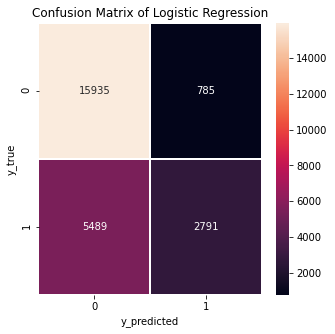

In [49]:
from sklearn.metrics import recall_score, confusion_matrix, precision_score, f1_score, accuracy_score, classification_report

#for Logistic Regression
cm_lr = confusion_matrix(y_test,lr_model.predict(x_test))

# %% confusion matrix visualization
import seaborn as sns
f, ax = plt.subplots(figsize = (5,5))
sns.heatmap(cm_lr, annot = True, linewidths = 0.5, color = "red", fmt = ".0f", ax=ax)
plt.xlabel("y_predicted")
plt.ylabel("y_true")
plt.title("Confusion Matrix of Logistic Regression")
plt.show()

In [53]:
def print_scores(headline, y_true, y_pred):
    print(headline)
    acc_score = accuracy_score(y_true, y_pred)
    print("accuracy: ",acc_score)
    pre_score = precision_score(y_true, y_pred)
    print("precision: ",pre_score)
    rec_score = recall_score(y_true, y_pred)                            
    print("recall: ",rec_score)
    f_score = f1_score(y_true, y_pred, average='weighted')
    print("f1_score: ",f_score)

In [55]:
print_scores("Logistic Regression;",y_test, lr_model.predict(x_test))
print_scores("Random Forest;",y_test, rf_model_initial.predict(x_test))

Logistic Regression;
accuracy:  0.74904
precision:  0.7804809843400448
recall:  0.33707729468599035
f1_score:  0.714728876042714
Random Forest;
accuracy:  0.98912
precision:  0.9740705659483779
recall:  0.9935990338164251
f1_score:  0.9891468506865811
